In [11]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [14]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
df.shape

(205, 26)

In [18]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df["Companyname"] = df["CarName"].str.split(" ",n=1).str[0]

In [21]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Companyname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [22]:
# df.drop(["CarName"],axis = 1 ,inplace = True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Companyname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Companyname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [24]:
df.Companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [25]:
df.Companyname = df.Companyname.str.lower()

In [26]:
def replace_name(a,b):
    df.Companyname.replace(a,b,inplace = True)

replace_name("maxda","mazda")
replace_name("porsche","porcshce")
replace_name("toyouta","toyota")
replace_name("vokswagen","volkswagen")
replace_name("vw","volkswagen")


In [27]:
df.Companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Visualizing the Data

<Axes: ylabel='price'>

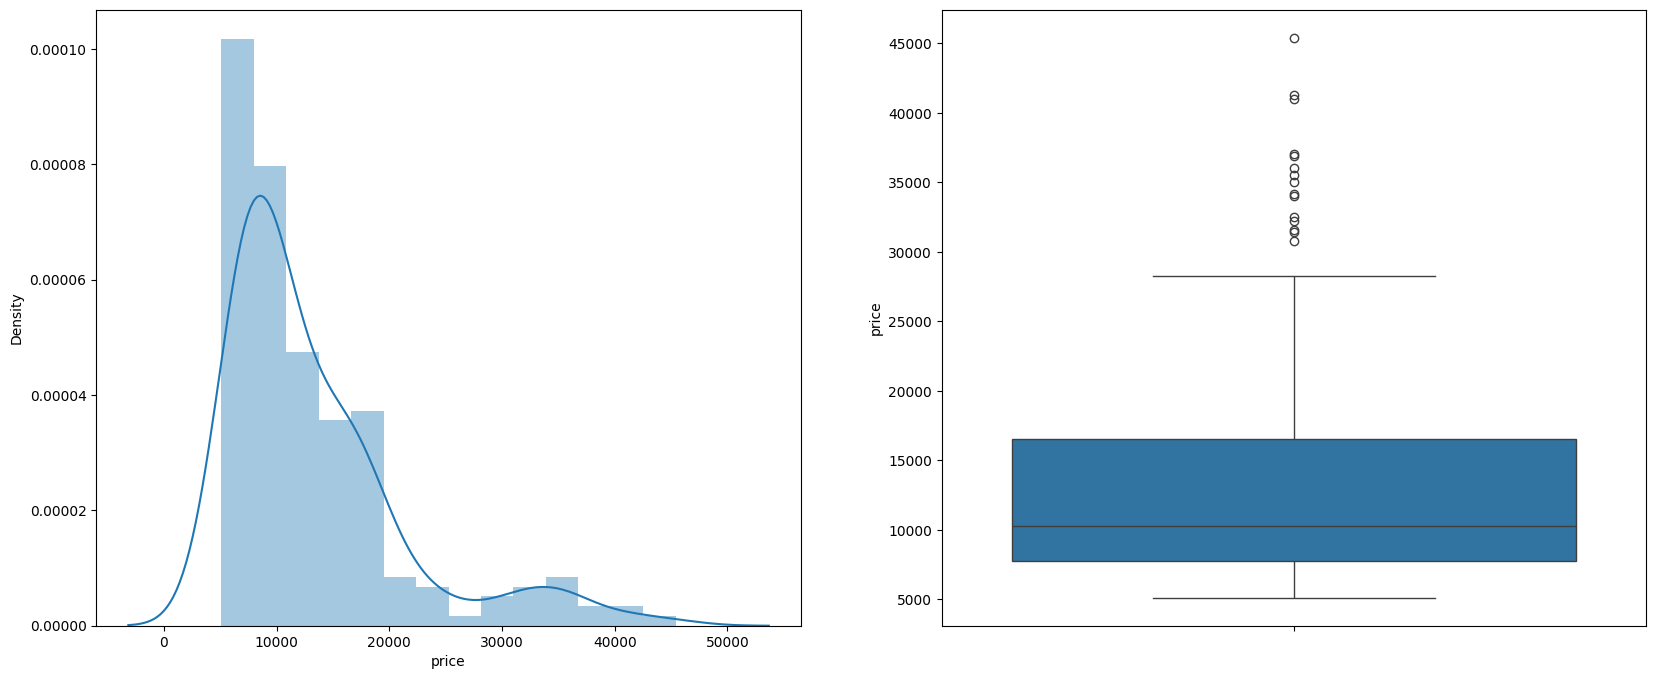

In [28]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)

In [29]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Companyname'],
      dtype='object')

<Axes: xlabel='carbody'>

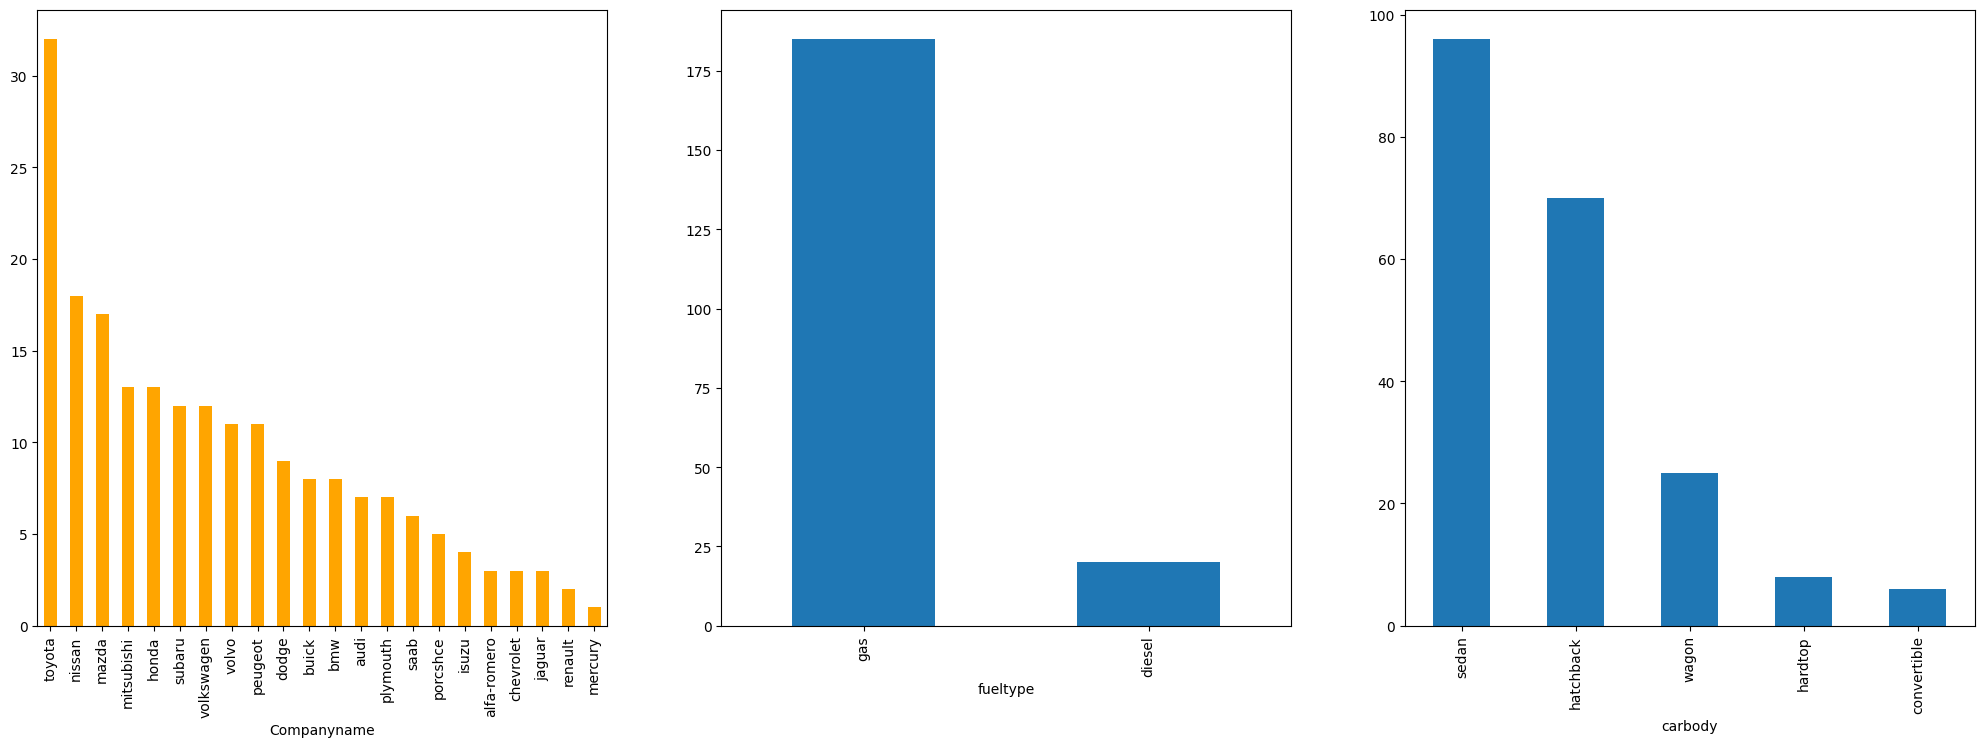

In [30]:
plt.figure(figsize = (25,8))

plt.subplot(1,3,1)
df.Companyname.value_counts().plot(kind = "bar",color = "orange")

plt.subplot(1,3,2)
df.fueltype.value_counts().plot(kind = "bar")

plt.subplot(1,3,3)
df.carbody.value_counts().plot(kind = "bar")

<Axes: xlabel='symboling', ylabel='price'>

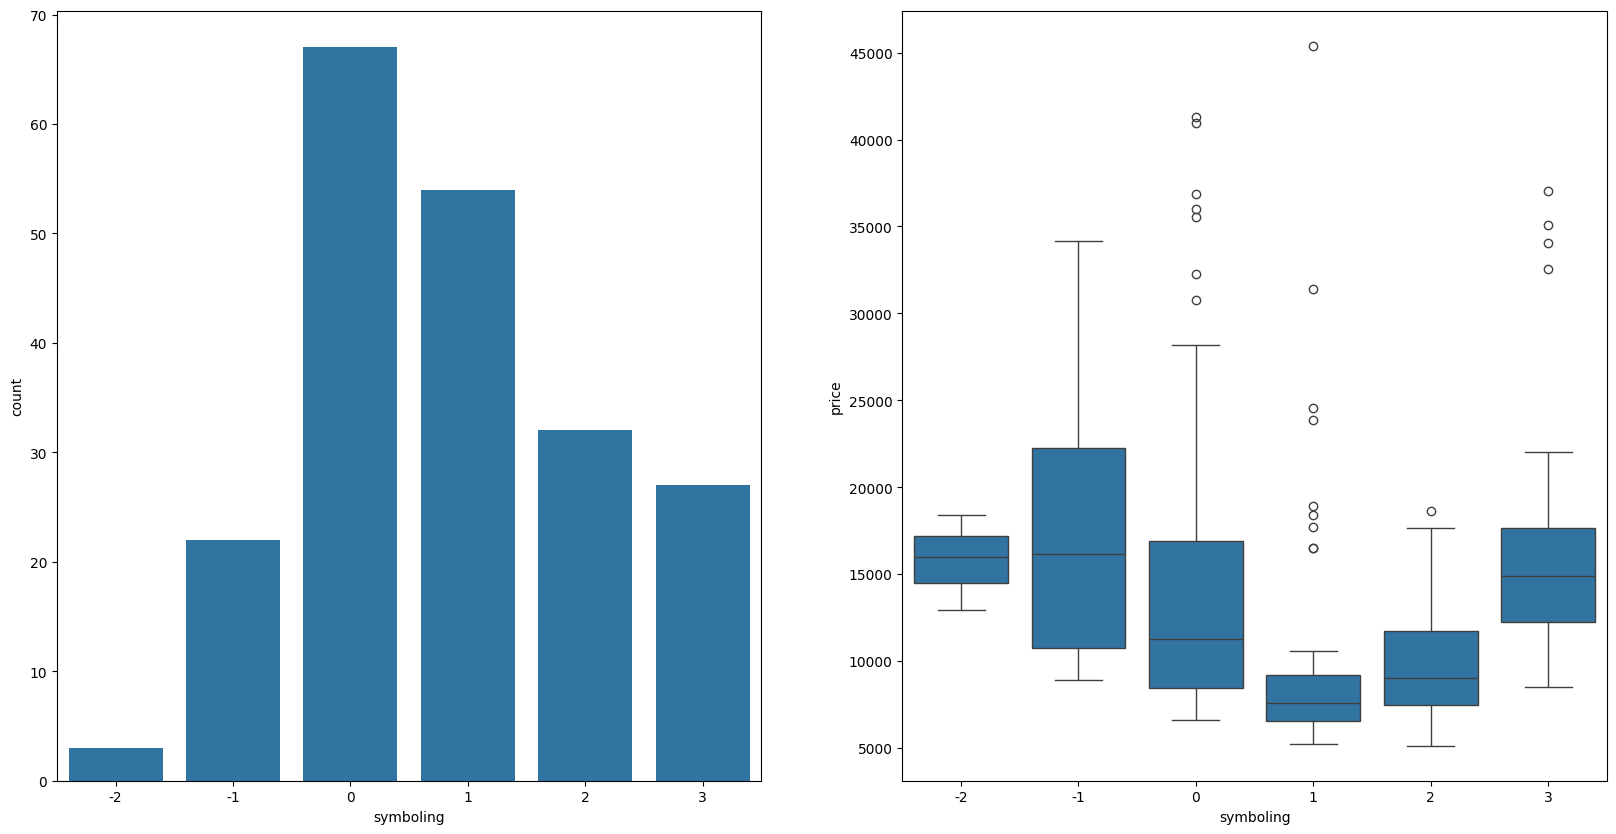

In [31]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x = df.symboling)

plt.subplot(1,2,2)
sns.boxplot(x = df.symboling,y = df.price)

<Axes: xlabel='enginetype', ylabel='price'>

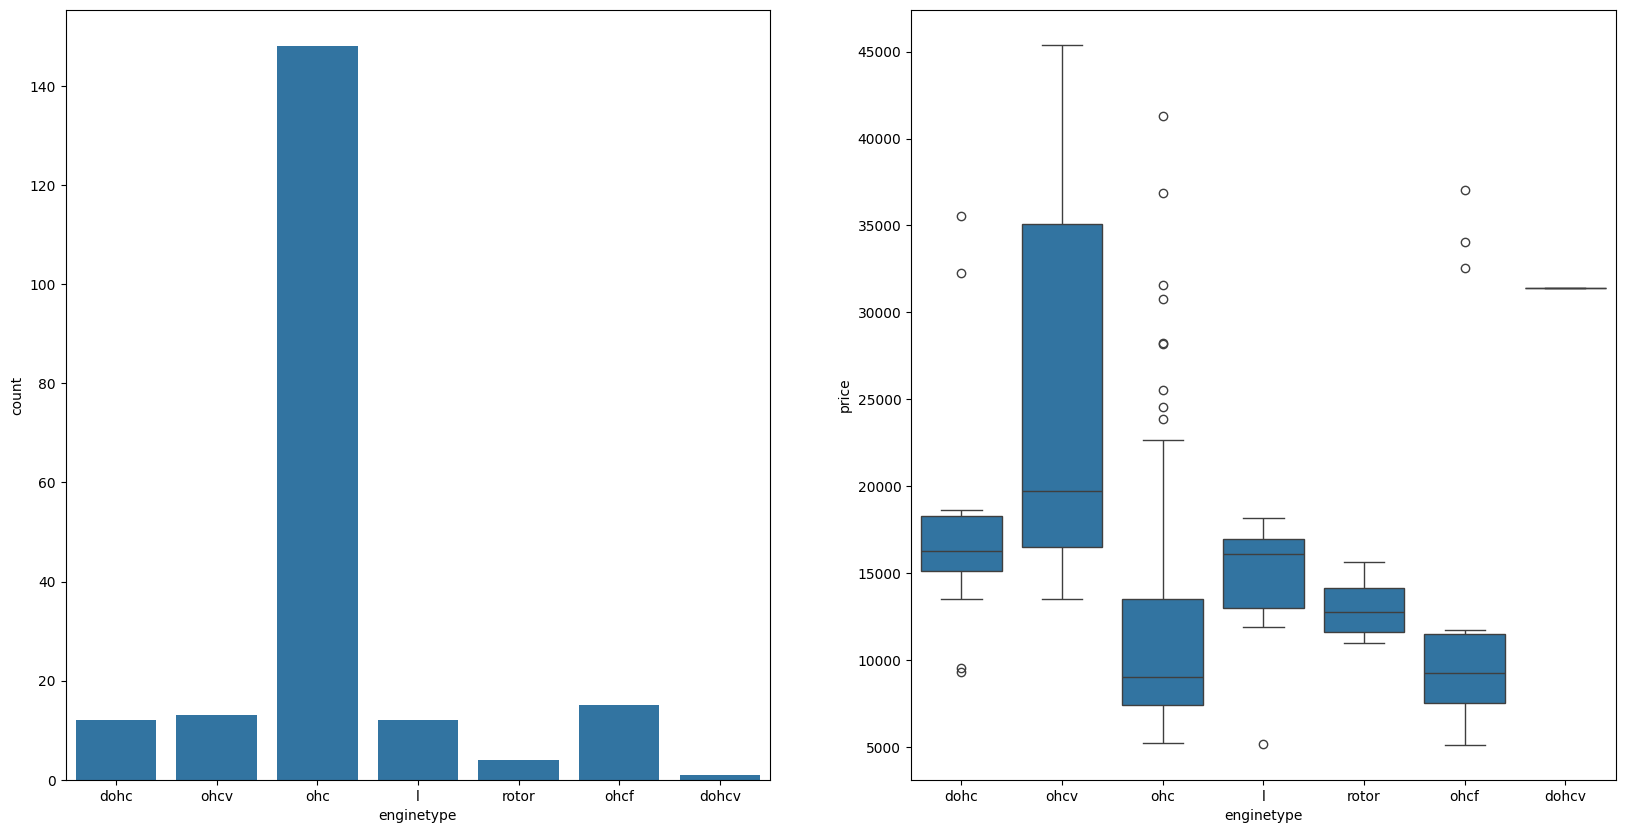

In [32]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x = df.enginetype)

plt.subplot(1,2,2)
sns.boxplot(x = df.enginetype,y = df.price)

<Axes: xlabel='doornumber', ylabel='price'>

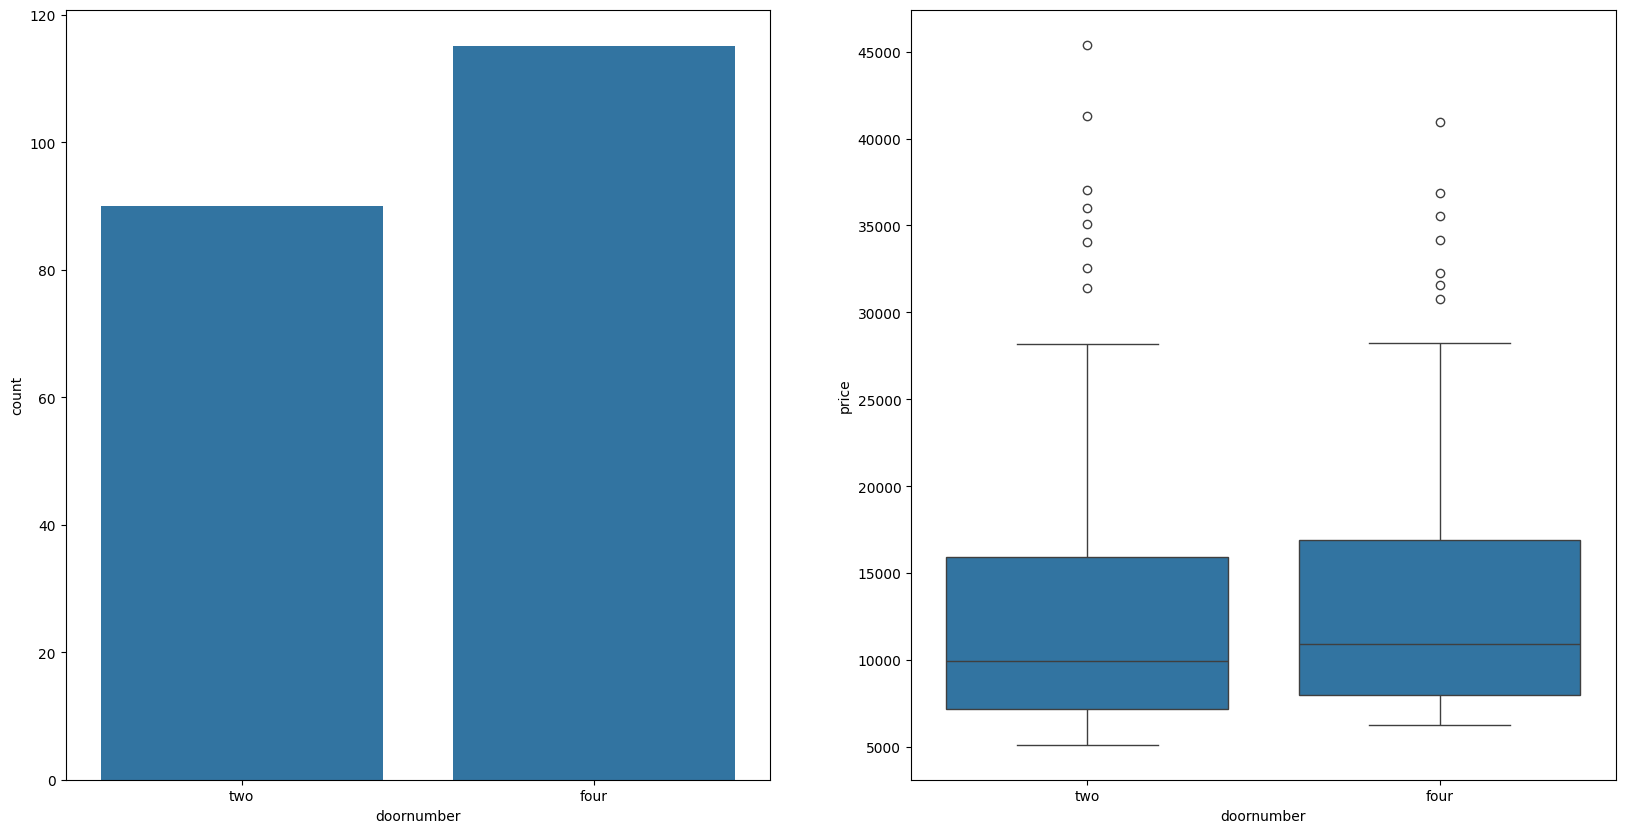

In [33]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x = df.doornumber)

plt.subplot(1,2,2)
sns.boxplot(x = df.doornumber,y = df.price)

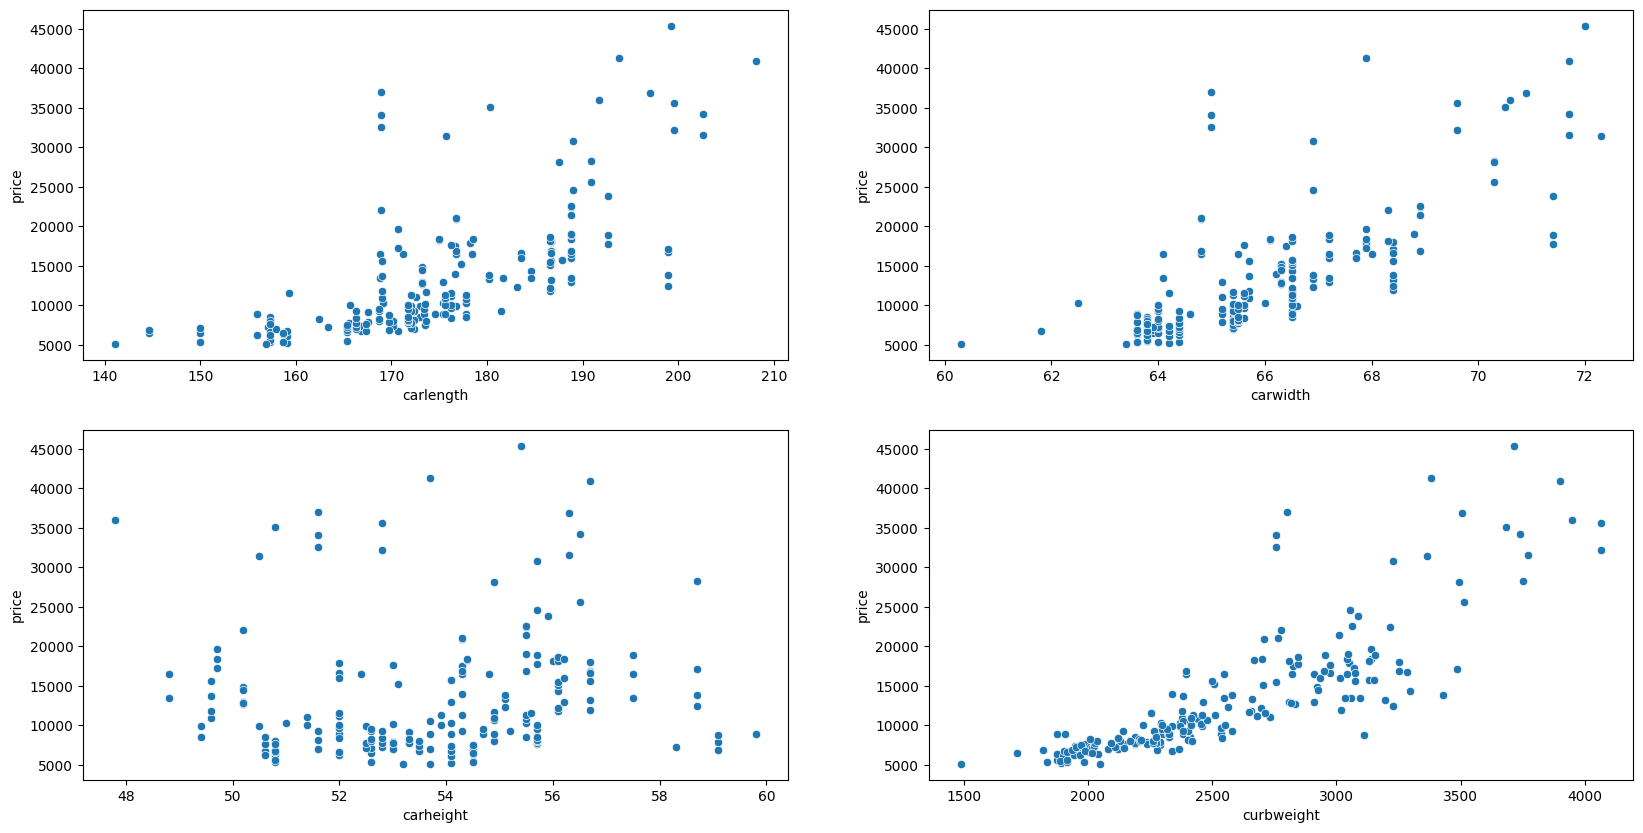

In [34]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    sns.scatterplot(x = df[x],y = df.price)

plt.figure(figsize = (20,10))
#carlength','carwidth', 'carheight', 'curbweight'

scatter("carlength",1)
scatter("carwidth",2)
scatter("carheight",3)
scatter("curbweight",4)

In [35]:
relevant_columns = ['carlength', 'carwidth', 'carheight', 'curbweight', 'price']
correlation_matrix = df[relevant_columns].corr()

In [36]:
print(correlation_matrix)


            carlength  carwidth  carheight  curbweight     price
carlength    1.000000  0.841118   0.491029    0.877728  0.682920
carwidth     0.841118  1.000000   0.279210    0.867032  0.759325
carheight    0.491029  0.279210   1.000000    0.295572  0.119336
curbweight   0.877728  0.867032   0.295572    1.000000  0.835305
price        0.682920  0.759325   0.119336    0.835305  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

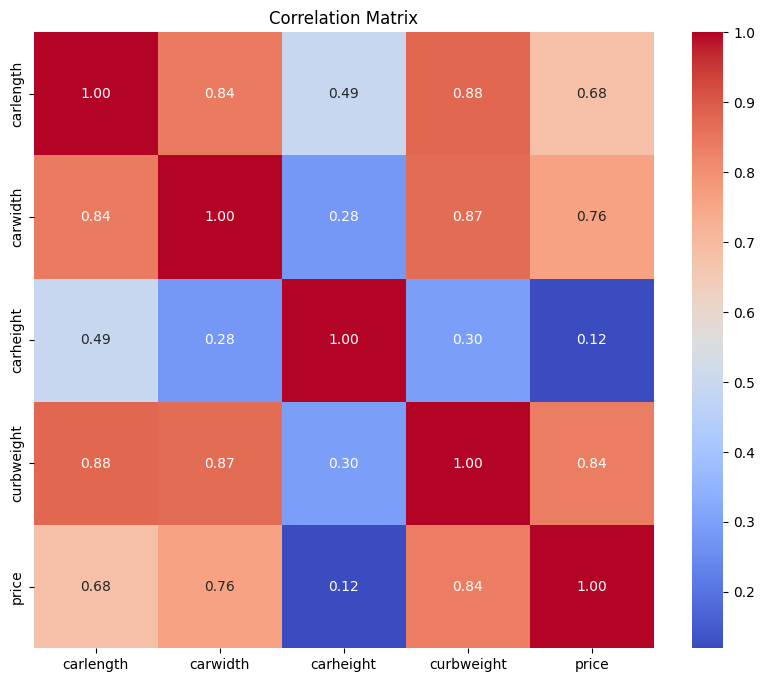

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')


In [38]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Companyname'],
      dtype='object')

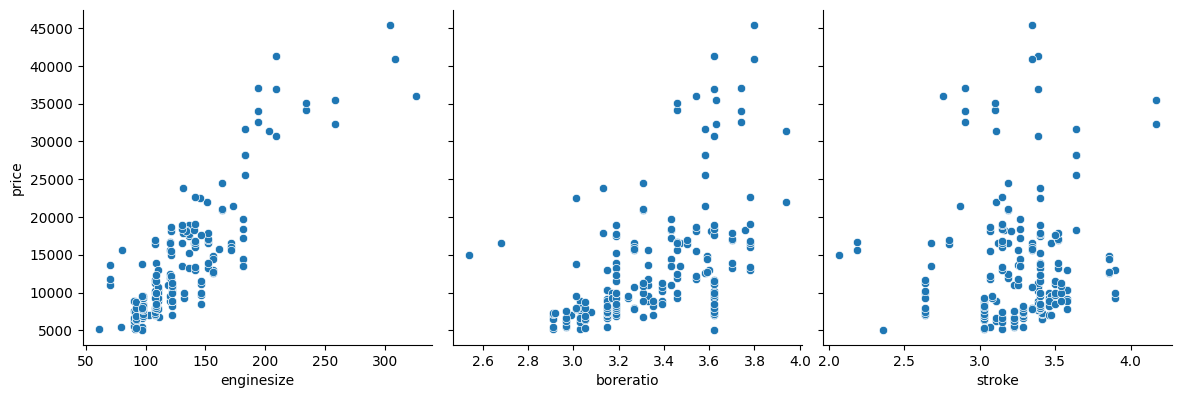

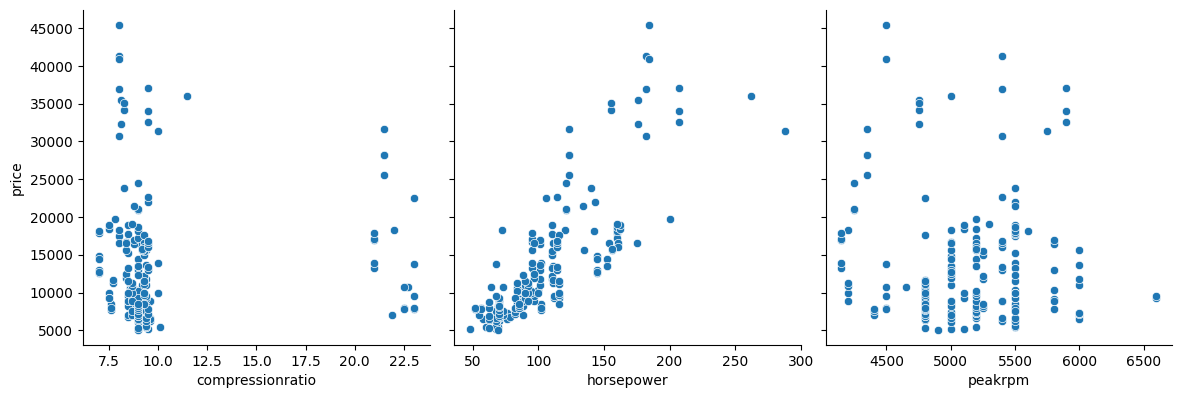

In [39]:
def visualize(x,y,z):
    sns.pairplot(df, x_vars = [x,y,z],y_vars = "price",size = 4,aspect= 1)

visualize('enginesize','boreratio','stroke')
visualize ('compressionratio','horsepower','peakrpm')

In [40]:
relevant_columns = ["compressionratio", 'price']
correlation_matrix = df[relevant_columns].corr()

In [41]:
correlation_matrix

,compressionratio,price
compressionratio,1.000000,0.067984
price,0.067984,1.000000


In [42]:
newdf = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']]

In [43]:
newdf

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,19,26,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,24,30,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,18,22,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,gas,std,sedan,rwd,109.1,2952,ohc,four,141,3.78,114,23,28,188.8,68.9
201,19045.0,gas,turbo,sedan,rwd,109.1,3049,ohc,four,141,3.78,160,19,25,188.8,68.8
202,21485.0,gas,std,sedan,rwd,109.1,3012,ohcv,six,173,3.58,134,18,23,188.8,68.9
203,22470.0,diesel,turbo,sedan,rwd,109.1,3217,ohc,six,145,3.01,106,26,27,188.8,68.9


In [44]:

# List of categorical columns
categorical_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']

# Create dummy variables
df_dummies = pd.get_dummies(newdf, columns=categorical_columns, drop_first=True)

In [45]:
df_dummies

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,False,False,False,False,False,True,False,False,False,False
1,16500.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,False,False,False,False,False,True,False,False,False,False
2,16500.0,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,False,False,True,False,False,False,True,False,False,False
3,13950.0,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,True,False,False,False,False,True,False,False,False,False
4,17450.0,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,2952,141,3.78,114,23,28,188.8,68.9,...,True,False,False,False,False,True,False,False,False,False
201,19045.0,109.1,3049,141,3.78,160,19,25,188.8,68.8,...,True,False,False,False,False,True,False,False,False,False
202,21485.0,109.1,3012,173,3.58,134,18,23,188.8,68.9,...,False,False,True,False,False,False,True,False,False,False
203,22470.0,109.1,3217,145,3.01,106,26,27,188.8,68.9,...,True,False,False,False,False,False,True,False,False,False


In [46]:
boolean_columns = df_dummies.select_dtypes(include=['bool']).columns
df_dummies[boolean_columns] = df_dummies[boolean_columns].astype(int)

In [47]:
df_dummies

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,2952,141,3.78,114,23,28,188.8,68.9,...,1,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,3049,141,3.78,160,19,25,188.8,68.8,...,1,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,3012,173,3.58,134,18,23,188.8,68.9,...,0,0,1,0,0,0,1,0,0,0
203,22470.0,109.1,3217,145,3.01,106,26,27,188.8,68.9,...,1,0,0,0,0,0,1,0,0,0


In [48]:
df_dummies.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [49]:
X = df_dummies[[ 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two']]

y =  df_dummies["price"]

In [50]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [51]:
X

,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,fueltype_gas,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
1,88.6,2548,130,3.47,111,21,27,168.8,64.1,1,...,0,0,0,0,0,1,0,0,0,0
2,94.5,2823,152,2.68,154,19,26,171.2,65.5,1,...,0,0,1,0,0,0,1,0,0,0
3,99.8,2337,109,3.19,102,24,30,176.6,66.2,1,...,1,0,0,0,0,1,0,0,0,0
4,99.4,2824,136,3.19,115,18,22,176.6,66.4,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,2952,141,3.78,114,23,28,188.8,68.9,1,...,1,0,0,0,0,1,0,0,0,0
201,109.1,3049,141,3.78,160,19,25,188.8,68.8,1,...,1,0,0,0,0,1,0,0,0,0
202,109.1,3012,173,3.58,134,18,23,188.8,68.9,1,...,0,0,1,0,0,0,1,0,0,0
203,109.1,3217,145,3.01,106,26,27,188.8,68.9,0,...,1,0,0,0,0,0,1,0,0,0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=100)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [57]:
y_pred = model.predict(X_test)
y_pred

array([10262.94610541, 10163.2505149 ,  9910.72763428,  4990.74449291,
        7113.46117872, 10053.95436614, 21915.54059825, 22873.40183186,
       26028.57789343, 15456.39123139, 21533.18757789, 11985.01735897,
       12036.6145679 ,  9423.42791706, 39454.2082922 ,  3856.87429963,
        7618.34450212, 12806.24937847, 18931.59580093, 14930.40231639,
       18563.21663078, 18349.1212025 , 24484.12042534,  5659.99921776,
       16386.62729527, 15668.10336457, 16221.64516946, 27135.85798501,
       13206.23357698, 10677.5098271 ,  6249.33000925, 27626.82892896,
       14643.97359725, 25999.87997682, 12215.38292892, 11327.76333479,
       12700.1848774 , 14109.28138737,  5909.30654157, 13343.93415594,
       36910.75545038, 12061.28433157,  6954.46460744,  8826.25734639,
        5518.93937649, 10305.88784837,  6772.81618789, 11962.75132502,
        9646.44917004,  9919.40362377,  5491.37902772, 16372.30462208,
        6796.83821178, 10928.27488205, 21273.98615994,  5203.98234288,
      

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2 = r2_score(y_test,y_pred)

In [60]:
r2

0.815579149757339

In [61]:
n = X_test.shape[0]
p = X_test.shape[1]

In [62]:
adjusted_r2 = 1 - (1- r2) * (n - 1) / (n - p - 1)

In [63]:
adjusted_r2

0.7580715727999501

In [8]:
import joblib


In [156]:
joblib.dump(model,'car_price_prediction_v2.joblib')

['car_price_prediction_v2.joblib']

In [78]:
joblib.load('car_price_prediction_v2.joblib')

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)
print(f'Mean Squared Error:{mse} \nMean Absolute Error:{mae} \nR2 Score:{r2}')

Mean Squared Error:11480961.731305972 
Mean Absolute Error:2482.312233326611 
R2 Score:0.815579149757339


In [1]:
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached mlflow-3.10.0-py3-none-any.whl.metadata (31 kB)
Using cached mlflow-3.10.0-py3-none-any.whl (10.2 MB)


In [65]:
import mlflow

In [72]:
mlflow.set_experiment("Car_Price_Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

with mlflow.start_run():
    mlflow.log_params({
        "model_type": "LinearRegression",
        "test_size": 0.6,
        "random_state": 100
    })
    mlflow.log_metrics({
        'MSE':mse,
        "MAE":mae,
        "R2_score":r2,
        "adjusted_r2":adjusted_r2
    })
    mlflow.sklearn.log_model(model,"LinearRegression")
    

2026/02/27 16:50:52 INFO mlflow.tracking.fluent: Experiment with name 'Car_Price_Prediction' does not exist. Creating a new experiment.
2026/02/27 16:50:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/27 16:50:53 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html


🏃 View run selective-swan-517 at: http://127.0.0.1:5000/#/experiments/2/runs/2d32dfdfcd4b419795a16431586fc9d6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
